# EDS232 Lab 1: Regression

## Overview
In this lab, we will introduce the basics of machine learning in **Python** with **regression** algorithms, a core technique used to predict continuous outcomes. We will use the popular **scikit-learn** library, which provides easy-to-use tools for building and evaluating machine learning models.

Specifically, we will learn how regression algorithms can help us model and predict water quality data.

## Objectives
By the end of this lab, you will be able to:
- Understand the concept of regression 
- Implement regression models in Python
- Evaluate model performance using  **R²** and **MSE**
- Visualize regression prediction results 

## Key Concepts

- **Regression**: A machine learning method for predicting continuous values.
  - **Simple Linear Regression**: A regression model with one independent variable.
  - **Polynomial Regression**: A regression model which models the relationship between X and Y as an n-degree polynomial.
  
- **Scikit-learn**: A Python library that provides simple and efficient tools for data mining and machine learning. We will use it for:
  - **Data Preprocessing**: Preparing data for the model.
  - **Model Training**: Fitting the regression model to our data.
  - **Model Evaluation**: Assessing model performance using model evaluation metrics.

- **Model Evaluation Metrics**: Tools to assess how well our model fits the data, such as:
  - **R² (R-squared)**: Measures the proportion of variance in the dependent variable that is predictable from the independent variable(s).
  - **MSE (Mean Square Error)**: The average squared differences between predicted and actual values.



### About the data

Hurricane Irene caused extensive flood and wind damage as it traveled across the Caribbean and up the East coast of the United States.  The Hurricane made landfall in the United States near Cape Lookout, North Carolina on August 27th, 2011 and was downgraded to a Tropical Storm by the time it hit the New York City region on Sunday, August 28th, 2011.

A dataset from the Hudson River Environmental Conditions Observing System (HRECOS) offers a detailed look at the effects of Hurricane Irene on the river's ecosystem through high-frequency, 15-minute interval measurements over a ten-day period. It includes variables critical to understanding ecological health, such as water temperature, dissolved oxygen, turbidity, depth, and meteorological data like rainfall and wind speed. Analyzing these variables helps answer questions about how extreme weather events like hurricanes can disrupt river ecosystems and impact water quality.
**You can access the data and metadata [here](https://www.caryinstitute.org/eco-inquiry/hudson-data-jam-competition/datasets/hurricane-irene-and-hudson-river).**

### Step 1: Import libraries and load data


#### Load libraries

In [2]:
import numpy as np # Import numpy
import pandas as pd # Import pandas 
import matplotlib.pyplot as plt # Import matplotlib 
from sklearn.model_selection import train_test_split # Import train_test_split 
from sklearn.linear_model import LinearRegression # Import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score # Import metrics 
import sklearn.linear_model # Import sklearn 
from sklearn.preprocessing import PolynomialFeatures # Import PolynomialFeatures 

np.random.seed(42) # Set a random seed for reproducibility

#### Load the data

Turbidity levels in water can be significantly affected by major weather events such as hurricanes. Turbidity measures how much light is blocked by particles in water. In an event like a hurricane, we expect wind and rainfall to bring in suspended particles, increasing the turbidity of the water. When light is blocked by particles in water, oxygen production is impacted as well. When a natural disaster like a hurricane alters turbidity levels in a body of water, how is dissolved oxygen  impacted? Let's find out. 

In this lab, we are interested in the turbidity and dissolved oxygen variables. Read the data into the `hurricane_do` and `hurricane_turbidity` variables. Then, merge these two dataframes. Store the result in the `df` variable. Drop the columns that contain data for Piermont, as Piermont does not contain any turbidity data. We are only interested in the Port of Albany and Norrie Point for this lab. 

*Notice that the data is not a csv file and is instead a **.xlsx** file! Use the `pandas.read_excel` function to read in your data. You can find more documentation on reading in .xlsx files [here](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html).*

In [3]:
fp = 'data/Hurricane Irene and the Hudson River.xlsx' # File path to the excel data file 
# Read the data from the 6th (index 5) sheet in the excel file, which contains dissolved oxygen data
hurricane_do = pd.read_excel(fp, sheet_name = 5).drop(['Piermont D.O. (ppm)'], axis = 1) # Drop the column 'Piermont D.O. (ppm)'
# Read the data from the 'Turbidity' sheet in the excel file, which contains turbidity data
hurricane_turbidity = pd.read_excel(fp, sheet_name='Turbidity').drop(['Piermont Turbidity in NTU'], axis = 1) # Drop the column 'Piermont Turbidity in NTU'
# Merge the two dataframes, based on matching 'Date Time (ET)' values
df = hurricane_do.merge(hurricane_turbidity, on = 'Date Time (ET)')

### Step 2: Explore  and clean the data

Do some initial exploratory analysis on the data. Check out what type of data you are working with, and plot your data. Write a few sentences on your findings. 

In [4]:
df.head() # Look at first few rows, dataframe structure

,Date Time (ET),Port of Albany D.O. (ppm),Norrie Point D.O. (ppm),Port of Albany Turbidity in NTU,Norrie Point Turbidity in NTU
0,2011-08-25 00:00:00,7.68,7.81,4.0,9.3
1,2011-08-25 00:15:00,7.60,7.73,3.9,8.4
2,2011-08-25 00:30:00,7.57,7.63,4.3,7.9
3,2011-08-25 00:45:00,7.72,7.67,4.7,8.1
4,2011-08-25 01:00:00,7.74,7.63,4.4,8.4


In [79]:
df.dtypes # Look at data types of columns

Date Time (ET)                      datetime64[ns]
 Port of Albany D.O. (ppm)                 float64
Norrie Point D.O. (ppm)                    float64
 Port of Albany Turbidity in NTU           float64
Norrie Point Turbidity in NTU              float64
dtype: object

In [80]:
df.isnull().sum() # Look at number of missing values for each column

Date Time (ET)                      0
 Port of Albany D.O. (ppm)          0
Norrie Point D.O. (ppm)             0
 Port of Albany Turbidity in NTU    0
Norrie Point Turbidity in NTU       0
dtype: int64

In [81]:
df.describe() # Look at summary stats for each numerical column (all)

,Date Time (ET),Port of Albany D.O. (ppm),Norrie Point D.O. (ppm),Port of Albany Turbidity in NTU,Norrie Point Turbidity in NTU
count,1152,1152.000000,1152.000000,1152.000000,1152.000000
mean,2011-08-30 23:52:30,8.747604,7.239479,201.378299,158.643490
min,2011-08-25 00:00:00,7.180000,5.910000,2.900000,6.800000
25%,2011-08-27 23:56:15,7.940000,6.990000,6.100000,25.675000
50%,2011-08-30 23:52:30,8.880000,7.260000,74.250000,175.850000
75%,2011-09-02 23:48:45,9.390000,7.470000,214.500000,245.625000
max,2011-09-05 23:45:00,9.900000,8.030000,1180.000000,887.000000
std,NaN,0.743613,0.334288,306.731404,110.971251


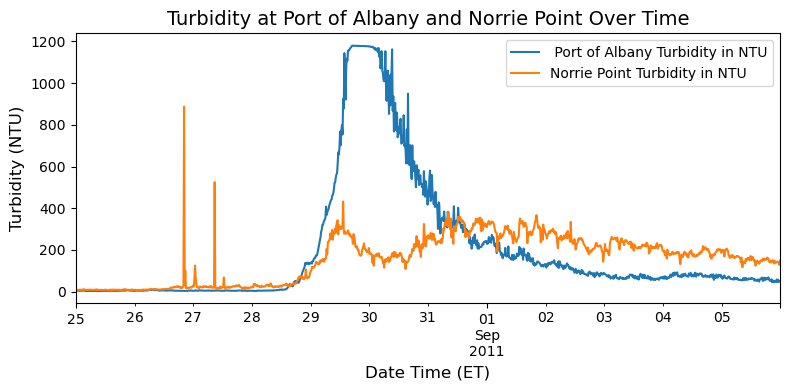

In [5]:
# Plot turbidity columns for both locations 
ax = df.plot(x='Date Time (ET)', # X-axis
             y=[' Port of Albany Turbidity in NTU', 'Norrie Point Turbidity in NTU'], # Y-axis
             figsize=(8, 4)) # Figure size

# Add title and labels
ax.set_title('Turbidity at Port of Albany and Norrie Point Over Time', fontsize=14) # Title
ax.set_xlabel('Date Time (ET)', fontsize=12) # X-axis label, font size
ax.set_ylabel('Turbidity (NTU)', fontsize=12) # Y-axis label, font size

# Display the plot
plt.tight_layout()
plt.show()

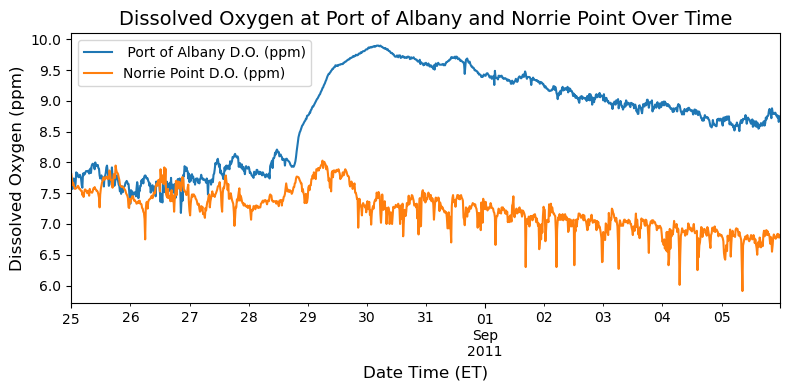

In [6]:
# Plot dissolved oxygen for both locations
ax = df.plot(x='Date Time (ET)', # X-axis
             y=[' Port of Albany D.O. (ppm)', 'Norrie Point D.O. (ppm)'], # Y-axis
             figsize=(8, 4)) # Figure size

# Add title and labels
ax.set_title('Dissolved Oxygen at Port of Albany and Norrie Point Over Time', fontsize=14) # Title
ax.set_xlabel('Date Time (ET)', fontsize=12) # X-label, font size
ax.set_ylabel('Dissolved Oxygen (ppm)', fontsize=12) # Y-axis, font size

# Display the plot
plt.tight_layout()
plt.show()

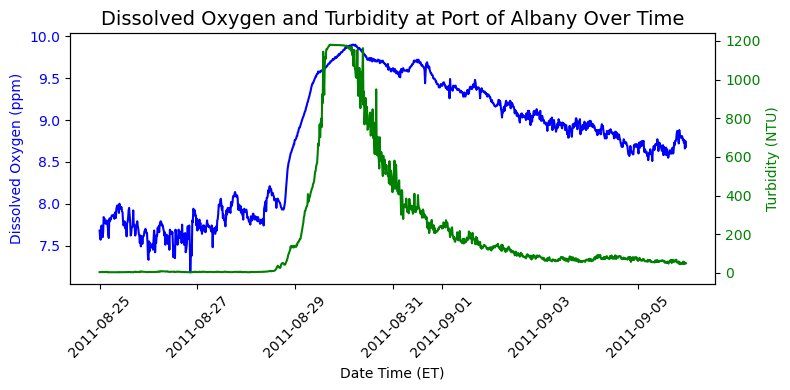

In [7]:
# Plot dissolved oxygen and turbidity for Port Albany
fig, ax1 = plt.subplots(figsize=(8, 4))
# Plot primary y-axis 
ax1.plot(df['Date Time (ET)'], # X-axis
         df[' Port of Albany D.O. (ppm)'], # Y-axis
         color='blue') # Color
ax1.set_xlabel('Date Time (ET)') # X-axis label
ax1.set_ylabel('Dissolved Oxygen (ppm)', color='blue') # Y-axis label
ax1.tick_params(axis='y', labelcolor='blue') # Y-axis tick marks color

# Rotate x-axis labels for better readability
ax1.tick_params(axis='x', rotation=45)

# Create a secondary y-axis for Turbidity
ax2 = ax1.twinx() 
ax2.plot(df['Date Time (ET)'], # X-axis
         df[' Port of Albany Turbidity in NTU'], # Y-axis
         color='green') # Color
ax2.set_ylabel('Turbidity (NTU)', color='green') # Y-axis label
ax2.tick_params(axis='y', labelcolor='green') # Y-axis tick marks color

# Add title
plt.title('Dissolved Oxygen and Turbidity at Port of Albany Over Time', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

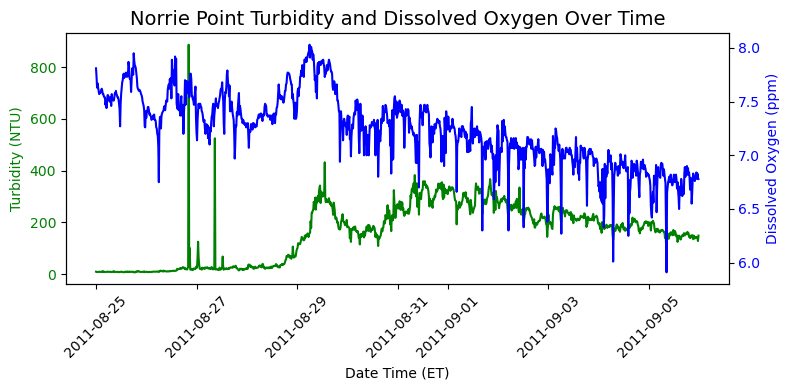

In [8]:
# Plot dissolved oxygen and turbidity for Norrie Point
fig, ax1 = plt.subplots(figsize=(8, 4))
# Plot primary axis (left side)
ax1.plot(df['Date Time (ET)'], # X-axis
         df['Norrie Point Turbidity in NTU'], # Y-axis
         color='green') # Color
ax1.set_xlabel('Date Time (ET)') # X-axis label
ax1.set_ylabel('Turbidity (NTU)', color='green') # Y-axis label
ax1.tick_params(axis='y', labelcolor='green') # Y-axis tick marks color

# Rotate x-axis labels for better readability
ax1.tick_params(axis='x', rotation=45)

# Create a secondary y-axis (right side)
ax2 = ax1.twinx()
ax2.plot(df['Date Time (ET)'], # X-axis
         df['Norrie Point D.O. (ppm)'], # Y-axis
         color='blue') # Color
ax2.set_ylabel('Dissolved Oxygen (ppm)', color='blue') # Y-axis label 
ax2.tick_params(axis='y', labelcolor='blue') # Y-axis tick marks color

# Add a title
plt.title('Norrie Point Turbidity and Dissolved Oxygen Over Time', fontsize=14)

# Display the plot with appropriate layout
plt.tight_layout()
plt.show()

**Exploration findings**

The dataframe has five rows after merging and dropping unecessary columns. The columns are type float64 for turbidity and dissolved oxygen, for each location. The date time column is type datetime64, appropriate for further analysis of the data. There are no missing values for any column, which is great and plotting will be smooth. The plots shown above are of turbidity and dissolved oxygen for each location, separately. I wanted to see turbidty in one plot for both locations, and dissolved oxygen in one plot for both locations. I then wanted to look at turbidity and dissolve oxygen in the same plot per location. This way I am able to visualize the peaks better. This way I can better understand the training and testing that happens next. I quickly looked at some stats for each numerical column which for this exploration was all the colums.

When you were exploring the data, you may have noticed that the column names aren't the cleanest. Update the column names to the following : `date`, `albany_DO`, `norrie_DO`, `albany_turbidity`, `norrie_turbidity` (**make sure your column names are in that order!!**). 

In [92]:
df.columns = ['date', 'albany_DO', 'norrie_DO', 'albany_turbidity', 'norrie_turbidity'] # Change column names
df # Check to make sure column names were updated

,date,albany_DO,norrie_DO,albany_turbidity,norrie_turbidity
0,2011-08-25 00:00:00,7.68,7.81,4.0,9.3
1,2011-08-25 00:15:00,7.60,7.73,3.9,8.4
2,2011-08-25 00:30:00,7.57,7.63,4.3,7.9
3,2011-08-25 00:45:00,7.72,7.67,4.7,8.1
4,2011-08-25 01:00:00,7.74,7.63,4.4,8.4
...,...,...,...,...,...
1147,2011-09-05 22:45:00,8.73,6.84,47.2,144.1
1148,2011-09-05 23:00:00,8.76,6.78,56.7,139.7
1149,2011-09-05 23:15:00,8.66,6.83,47.0,141.2
1150,2011-09-05 23:30:00,8.75,6.79,48.7,127.9


### Step 3: Prepare the data for machine learning

It is time to split our data into training and testing data for our linear regression model. The `train_test_split` function from the `sklearn.model_selection` module will let us accomplish this.

The `train_test_split` function takes two inputs: X and Y, and produces four outputs: X_train, X_test, Y_train, and Y_test.  It also takes two parameters, `test_size`, which specifies the proportion of data to be used in the testing set and `random_state`.

This process allows us to train the model on a subset of the data (training set) and then evaluate its performance and generalizability on unseen data (testing set). By doing this, we can assess how well the model predicts dissolved oxygen levels based on turbidity after a storm. 

Select your data such that `albany_turbidity` is your feature or independent variable (X) and `albany_DO` is your target or dependent variable (Y). Then split it using `train_test_split`.

 **Use a test size of 0.33 and a random state of 42**. 

In [94]:
# Select features and target
X = df['albany_turbidity'] # Set independent variable, predictor
Y = df['albany_DO'] # Set dependent variable, target
# Split data into training and testing sets per variable
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
X_train = np.array(X_train).reshape(-1, 1)  # Reshape to 2-d array
X_test = np.array(X_test).reshape(-1, 1) # Reshape to 2-d array

### Step 4: Select your model

We are going to use linear regression to predict the turbidity in Albany. Is linear regression a good model to pick to achieve this goal? Answer in the markdown cell below.

I am not sure if it is the best option because I did not necessarily look at whether the relationship between turbidity and dissolved oxygen was linear. It would be a good option if the points fall within a straight line. However, based on the few things I did plot it does look like there is a relationship that could be linear but I don't know how well points would fall within that linear relationship. The following code will be interesting to look at and see whether linear regression is a good model. 

In [95]:
# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

### Step 5: Evaluate the model

Now it's time to see how well our model does on this task.  To accomplish this, make predictions with your model on the test data and then check its performance by examining the MSE and the $R^2$ score. Because we held the test data out from the training process, these predictions give us an idea of how our model performs on unseen data. Then visualize your model's performance by creating a scatter plot of the Y predictions and your Y test data. 

Mean Squared Error: 0.5320298550773815
R² Score: 0.48988874519870107


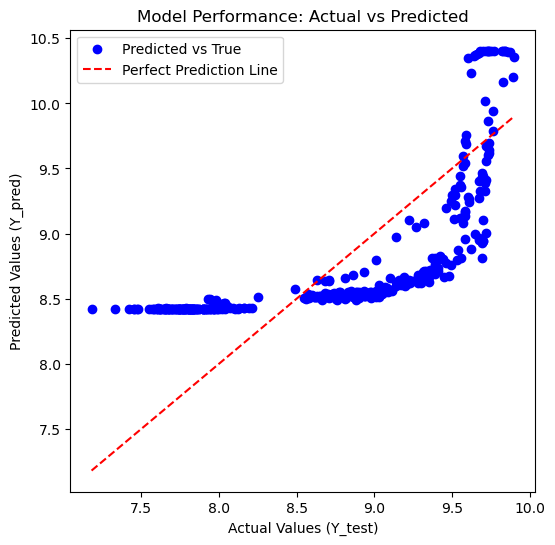

In [44]:
# Make predictions
Y_pred = model.predict(X_test)

# Calculate evaluation metrics using scikit-learn's mean_squared_error and r2_score
mse = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Visualize predictions vs. actual values
plt.figure(figsize=(6, 6))

# Scatter plot of actual vs predicted values
plt.scatter(Y_test, Y_pred, color='blue', label='Predicted vs True')

# Plot diagonal line (y = x) for reference
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Perfect Prediction Line')

# Labels and title
plt.xlabel('Actual Values (Y_test)')
plt.ylabel('Predicted Values (Y_pred)')
plt.title('Model Performance: Actual vs Predicted')

# Display legend
plt.legend()

# Show the plot
plt.show()

### Step 6:  Present the Solution
In the markdown cell below, discuss how your model performed overall. If the model performed poorly, why do you think it did so? If it performed well, why do you think it did so? What could future analysis include? 

The model did not perform well because the points do not fall within a straight line. The perfect prediction line for reference is dashed red and the points for y predictions and y test in blue are curved and not all near the straight line. The mean square error is low which is good because it interprets how far from the mean the values are which represents the model is making accurate predictions. The $R^2$ is low which is not good because this explains the percent of variance. The model is only explaining 49% of the variance for the relationship between turbidity and dissolved oxygen. A future analysis could be a polynomial regression because the $R^2$ is low.

#### *Before we selected our algorithm, we should have looked at the data for evidence of a linear relationship between variables. Let's check now!*

<Figure size 1000x600 with 0 Axes>

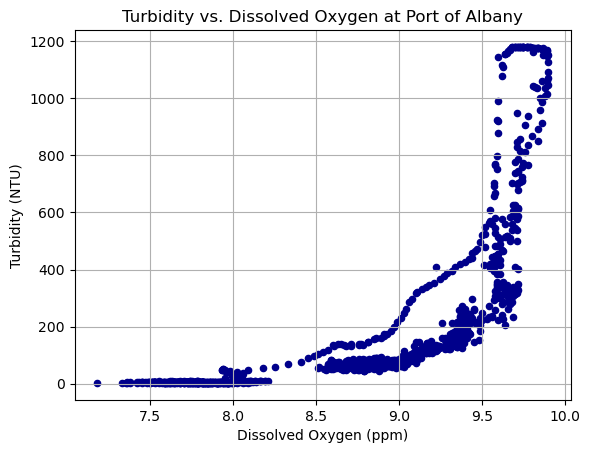

In [45]:
plt.figure(figsize=(10, 6))  # Setting the figure size for better visibility
df.plot.scatter(x='albany_DO', y='albany_turbidity', c='DarkBlue')

plt.title('Turbidity vs. Dissolved Oxygen at Port of Albany')
plt.xlabel('Dissolved Oxygen (ppm)')
plt.ylabel('Turbidity (NTU)')
plt.grid(True)
plt.show()

### Step 7: Check to see if polynomial regression performs better

We assumed linear regression would work well with our data, but this data doesn't look very linear. It's a good reminder of the importance of exploratory analysis. Let's check to see how a polynomial regression performs in comparison. Transform the features for polynomial regression. Use the `PolynomialFeatures` class from the `sklearn.preprocessing` module. 

In [96]:
# Transform features to include polynomial terms (degree 2 for quadratic terms)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train) # Train
X_poly_test = poly.transform(X_test) # Test

# View the transformed feature set (for insight)
print(X_poly_train)

[[1.00000e+00 5.00000e+00 2.50000e+01]
 [1.00000e+00 7.51000e+01 5.64001e+03]
 [1.00000e+00 7.39000e+02 5.46121e+05]
 ...
 [1.00000e+00 6.29000e+01 3.95641e+03]
 [1.00000e+00 8.18000e+01 6.69124e+03]
 [1.00000e+00 5.53000e+01 3.05809e+03]]


### Step 8: Fit your model on the polynomial features

In [48]:
# Train the model on polynomial features 
poly_model = LinearRegression()
poly_model.fit(X_poly_train, Y_train)

LinearRegression()

### STEP 9: Evaluate the polynomial regression model 
- Make predictions with your model and then check the performance of the model.
- Check your model performance by looking at the MSE and the $R^2$ score.
- Create a scatter plot of the Y polynomial predictions and your Y test data.

Polynomial Regression Mean Squared Error: 0.38756190338799007
Polynomial Regression R² Score: 0.7293082257073078


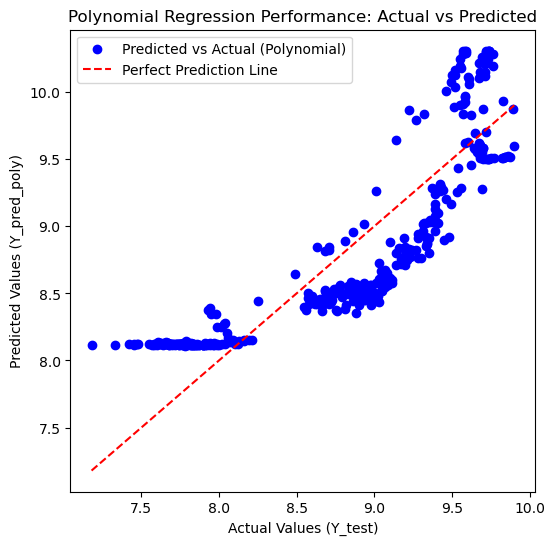

In [97]:
# Make predictions using the polynomial model
Y_poly_pred = poly_model.predict(X_poly_test)

# Calculate evaluation metrics using scikit-learn's mean_squared_error and r2_score
poly_mse = np.sqrt(mean_squared_error(Y_test, Y_poly_pred))
poly_r2 = r2_score(Y_test, Y_poly_pred)

print(f"Polynomial Regression Mean Squared Error: {poly_mse}")
print(f"Polynomial Regression R² Score: {poly_r2}")

# Plot predictions vs actual
plt.figure(figsize=(6, 6))

# Scatter plot of actual vs predicted values for polynomial regression
plt.scatter(Y_test, Y_poly_pred, color='blue', label='Predicted vs Actual (Polynomial)')

# Plot diagonal line (y = x) for reference
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Perfect Prediction Line')

# Labels and title
plt.xlabel('Actual Values (Y_test)')
plt.ylabel('Predicted Values (Y_pred_poly)')
plt.title('Polynomial Regression Performance: Actual vs Predicted')

# Display legend
plt.legend()

# Show the plot
plt.show()

### Step 10: Compare your polynomial and linear regression results

What differences did you notice between you polynomial regression and linear regression results? Which model performed better? Why do you think this is? Write your answer in the markdown cell below. 

Yes, there is a difference between the polynomial regression and linear regression. The polynomial regression performed better. The mean squared error is smaller for the polynomial regression so the prediction is more accurate. The $R^2$ is larger for the polynomial regression model so it represents a greater percent of variance for the relationship between turbidity and dissolved oxygen. The points fall closer to the perfect prediction line.